In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import time
from matplotlib import colors

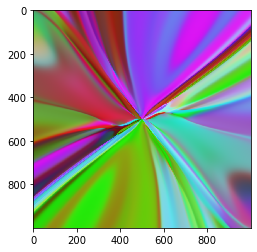

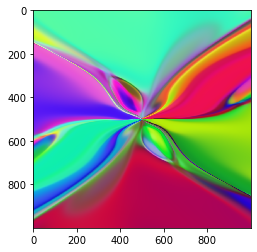

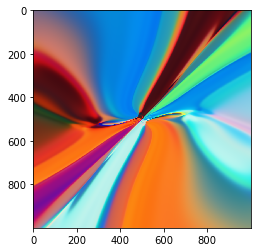

In [6]:
#%matplotlib qt
%matplotlib inline
#%matplotlib nbagg
class NN():
    def __init__(self, Neurone_layers = 16, Neurone_nbr = 16, Borne = 1, seed = 2):
        super(NN, self).__init__()
        tf.random.set_seed(
            seed
        )
        initializer = tf.keras.initializers.RandomUniform(-Borne, Borne)
        Layers = [tf.keras.layers.Dense(Neurone_nbr, input_shape=(2,)
                        , activation="tanh",use_bias=True, 
                        kernel_initializer=initializer)]
        
        for i in range(Neurone_layers):
            Layers += [tf.keras.layers.Dense(Neurone_nbr, input_shape=(Neurone_nbr,)
                    , activation="tanh",use_bias=False, 
                    kernel_initializer=initializer)]
        Layers += [tf.keras.layers.Dense(3, input_shape=(Neurone_nbr,)
                , activation="sigmoid",use_bias=False, 
                kernel_initializer=initializer)]
        self.Model = tf.keras.Sequential(Layers)
    
    def Compute(self, x):
        return self.Model(x)
def Make_Plot(Colors):
    plt.figure()
    plt.imshow(Colors, interpolation = 'nearest', vmin = 0, vmax = 1)

def Run_Color(seed):
    ROWS = COL = 1000
    Board = np.zeros((ROWS, COL,2))
    Net = NN(seed = seed)
    x = np.arange(COL)
    y = np.arange(ROWS)
    for i in x:
        for j in y:
            Board[j][i] = np.array((i/ROWS - 0.5,j/COL - 0.5))
            # Board[j][i] = np.array((i,j))
    Colors = Net.Compute(Board.reshape(ROWS*COL, 2))
    Make_Plot(Colors.numpy().reshape(COL,ROWS, 3))
    return Colors
for i in range(3):
    A = Run_Color(i)